In [6]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combine_data_df = pd.merge(ride_df, city_df, on='city')

# Display the data table for preview
combine_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

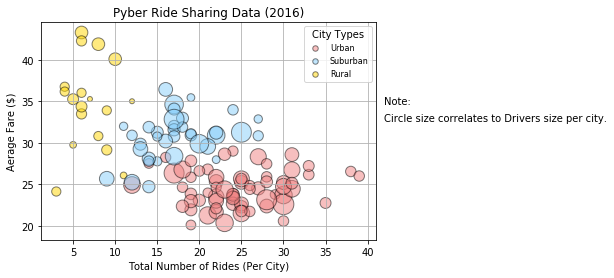

In [7]:
# Obtain the x and y coordinates for each of the three city types
urban_df      = combine_data_df.set_index('type').filter(like='Urban', axis=0)
suburban_df   = combine_data_df.set_index('type').filter(like='Suburban', axis=0)
rural_df      = combine_data_df.set_index('type').filter(like='Rural', axis=0)

urban_upsize = []
suburban_upsize = []
rural_upsize = []

# URBAN Dataframe (convert counts to list for charts)
urban_df_x = urban_df.groupby('city').count()
urban_x_array = urban_df_x[urban_df_x.columns[0]].tolist()

urban_df_y = urban_df.groupby('city').mean()
urban_y_array = urban_df_y[urban_df_y.columns[0]].tolist()

urban_df_size = urban_df.groupby('driver_count').count()
urban_size_array = urban_df_size[urban_df_size.columns[0]].tolist()

for x in urban_size_array:
    resize = x * 5
    urban_upsize.append(resize)

# SUBURBAN Dataframe (convert counts to list for charts)
suburban_df_x = suburban_df.groupby('city').count()
suburban_x_array = suburban_df_x[suburban_df_x.columns[0]].tolist()

suburban_df_y = suburban_df.groupby('city').mean()
suburban_y_array = suburban_df_y[suburban_df_y.columns[0]].tolist()

suburban_df_size = suburban_df.groupby('driver_count').count()
suburban_size_array = suburban_df_size[suburban_df_size.columns[0]].tolist()

for x in suburban_size_array:
    resize = x * 5
    suburban_upsize.append(resize)

# RURAL dataframe (convert counts to list for charts)
rural_df_x = rural_df.groupby('city').count()
rural_x_array = rural_df_x[rural_df_x.columns[0]].tolist()

rural_df_y = rural_df.groupby('city').mean()
rural_y_array = rural_df_y[rural_df_y.columns[0]].tolist()

rural_df_size = rural_df.groupby('driver_count').count()
rural_size_array = rural_df_size[rural_df_size.columns[0]].tolist()

for x in rural_size_array:
    resize = x * 5
    rural_upsize.append(resize)

# Build the scatter plots for each city types
Rural = plt.scatter(rural_x_array, rural_y_array, rural_upsize, marker="o", facecolors="gold", edgecolors="black", alpha=0.5)
Urban = plt.scatter(urban_x_array, urban_y_array, urban_upsize, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.5)
Suburban = plt.scatter(suburban_x_array, suburban_y_array, suburban_upsize, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Aerage Fare ($)")
plt.grid()

# Create a legend
lgnd = plt.legend((Urban, Suburban, Rural),
           ('Urban', 'Suburban', 'Rural'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8,
           title='City Types')
plt.text(42, 35, 'Note:',verticalalignment='center')
plt.text(42, 33, 'Circle size correlates to Drivers size per city.',verticalalignment='center')

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("../Images/pyber_ride_sharing_data.png")

## Total Fares by City Type

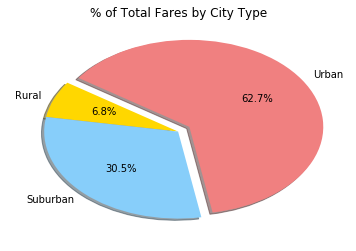

<Figure size 432x288 with 0 Axes>

In [3]:
# Calculate Type Percents
urban_count = urban_df['fare'].sum()
suburban_count = suburban_df['fare'].sum()
rural_count = rural_df['fare'].sum()

# Set color, lables, pie chart characteristics
labels = ["Urban", "Rural", "Suburban"]
num_of_rides = [urban_count, rural_count, suburban_count]
explode = (0.1, 0, 0)
colors = ["lightcoral", "gold", "lightskyblue"]

# Build Pie Chart
plt.title('% of Total Fares by City Type')
plt.pie(num_of_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.show()

# Save Figure
plt.savefig("../Images/percentage_fares_by_city_type.png")


## Total Rides by City Type

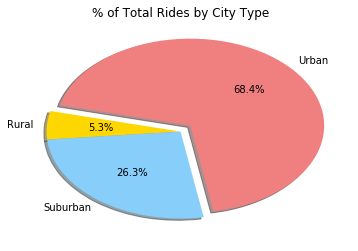

<Figure size 432x288 with 0 Axes>

In [4]:
# Calculate Ride Percents
urban_count = urban_df['ride_id'].count()
suburban_count = suburban_df['ride_id'].count()
rural_count = rural_df['ride_id'].count()

# Set color, lables, pie chart characteristics
labels = ["Urban", "Rural", "Suburban"]
num_of_rides = [urban_count, rural_count, suburban_count]
explode = (0.1, 0, 0)
colors = ["lightcoral", "gold", "lightskyblue"]

# Build Pie Chart
plt.title('% of Total Rides by City Type')
plt.pie(num_of_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.show()

# Save Figure
plt.savefig("../Images/percentage_rides_by_city_type.png")

## Total Drivers by City Type

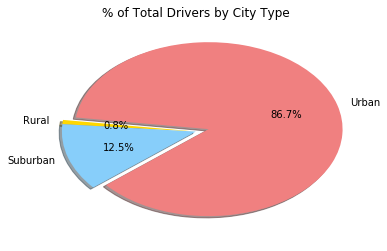

<Figure size 432x288 with 0 Axes>

In [5]:
# Calculate Driver Percents
urban_count = urban_df['driver_count'].sum()
suburban_count = suburban_df['driver_count'].sum()
rural_count = rural_df['driver_count'].sum()

# Set color, lables, pie chart characteristics
labels = ["Urban", "Rural", "Suburban"]
num_of_rides = [urban_count, rural_count, suburban_count]
explode = (0.1, 0, 0)
colors = ["lightcoral", "gold", "lightskyblue"]

# Build Pie Chart
plt.title('% of Total Drivers by City Type')
plt.pie(num_of_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=220)
plt.show()

# Save Figure
plt.savefig("../Images/percentage_drivers_by_city_type.png")
